# **Course 3 Automatidata project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

#### Scenario Description

You are the newest data professional in a fictional data consulting firm: Automatidata. The team is still early into the project, having only just completed an initial plan of action and some early Python coding work. 

Luana Rodriquez, the senior data analyst at Automatidata, is pleased with the work you have already completed and requests your assistance with some EDA and data visualization work for the New York City Taxi and Limousine Commission project (New York City TLC) to get a general understanding of what taxi ridership looks like. The management team is asking for a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help understand the data. At the very least, include a box plot of the ride durations and some time series plots, like a breakdown by quarter or month. 

Additionally, the management team has recently asked all EDA to include Tableau visualizations. For this taxi data, create a Tableau dashboard showing a New York City map of taxi/limo trips by month. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director at the New York City TLC is a person with visual impairments.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 3 End-of-course project: Exploratory data analysis

In this activity, you will examine data provided and prepare it for analysis. You will also design a professional data visualization that tells a story, and will help data-driven decisions for business needs. 

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Your mission is to continue the investigation you began in C2 and perform further EDA on this data with the aim of learning more about the variables. 
  
**The goal** is to clean data set and create a visualization.
<br/>  
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluate and share results

<br/> 
Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work. 



# **Visualize a story in Tableau and Python**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

## PACE: Plan 

### Task 1. Imports, links, and loading

For EDA of the data, import the data and packages that would be most helpful, such as pandas, numpy and matplotlib. 


### Data Dictionary

| Column name            | Description                                                                                                             |
|------------------------|-------------------------------------------------------------------------------------------------------------------------|
| ID                     | Trip identification number                                                                                              |
| VendorID               | A code indicating the TPEP provider that provided the record. **<br> 1 = Creative Mobile Technologies, LLC <br> 2 = VeriFone Inc.**      |
| tpep_pickup_datetime    | The date and time when the meter was engaged.                                                                            |
| tpep_dropoff_datetime   | The date and time when the meter was disengaged.                                                                         |
| Passenger_count         | The number of passengers in the vehicle. <br> This is a driver-entered value.                                            |
| Trip_distance           | The elapsed trip distance in miles reported by the taximeter.                                                           |
| PULocationID            | TLC Taxi Zone in which the taximeter was engaged.                                                                        |
| DOLocationID            | TLC Taxi Zone in which the taximeter was disengaged.                                                                     |
| RateCodeID              | The final rate code in effect at the end of the trip. **<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br> 4 = Nassau or Westchester <br> 5 = Negotiated fare <br> 6 = Group ride**|
| Store_and_fwd_flag      | This flag indicates whether the trip record was held in vehicle memory before being sent to the vendor. **<br> Y= store and forward trip <br> N= not a store and forward trip** |
| Payment_type            | A numeric code signifying how the passenger paid. **<br> 1 = Credit card <br> 2 = Cash <br> 3 = No charge <br> 4 = Dispute <br> 5 = Unknown <br> 6 = Voided trip** |
| Fare_amount             | The time-and-distance fare calculated by the meter.                                                                      |
| Extra                   | Miscellaneous extras and surcharges, including rush hour and overnight charges.                                          |
| MTA_tax                 | $0.50 MTA tax that is automatically triggered based on the metered rate in use.                                          |
| Improvement_surcharge   | $0.30 improvement surcharge assessed trips at the flag drop.                                                             |
| Tip_amount              | Tip amount – This field is automatically populated for credit card tips. <br> Cash tips are not included.                |
| Tolls_amount            | Total amount of all tolls paid in trip.                                                                                  |
| Total_amount            | The total amount charged to passengers. <br> Does not include cash tips.                                                  |



In [1]:
# Import packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import scipy as sp
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
#import statsmodels.api as sm
#from tqdm import tqdm
#import re

import datetime as dt

import json


**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [26]:
df.head(20)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.00,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.00,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.00,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.00,0.3,16.55


In [9]:
df.isnull().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,22699.0,5.675849e+07,3.274493e+07,12127.0,28520556.00,56731504.00,85374524.00,1.134863e+08
VendorID,22699.0,1.556236e+00,4.968384e-01,1.0,1.00,2.00,2.00,2.000000e+00
passenger_count,22699.0,1.642319e+00,1.285231e+00,0.0,1.00,1.00,2.00,6.000000e+00
trip_distance,22699.0,2.913313e+00,3.653171e+00,0.0,0.99,1.61,3.06,3.396000e+01
RatecodeID,22699.0,1.043394e+00,7.083909e-01,1.0,1.00,1.00,1.00,9.900000e+01
PULocationID,22699.0,1.624124e+02,6.663337e+01,1.0,114.00,162.00,233.00,2.650000e+02
DOLocationID,22699.0,1.615280e+02,7.013969e+01,1.0,112.00,162.00,233.00,2.650000e+02
payment_type,22699.0,1.336887e+00,4.962111e-01,1.0,1.00,1.00,2.00,4.000000e+00
fare_amount,22699.0,1.302663e+01,1.324379e+01,-120.0,6.50,9.50,14.50,9.999900e+02
extra,22699.0,3.332746e-01,4.630966e-01,-1.0,0.00,0.00,0.50,4.500000e+00


In this stage, consider the following questions where applicable to complete your code response:

### Identify any outliers: 

##### *   What methods are best for identifying outliers?

##### **Statistical Techniques:**
- **Z-Score:** Measures how many standard deviations a data point is from the mean.
- **IQR (Interquartile Range):** This method uses the first (Q1) and third (Q3) quartiles to find the range where most data points lie.

##### **Visualization Techniques:**
- **Box Plot:** A quick visualization to spot outliers.
- **Scatter Plot:** Useful to spot outliers in two-variable datasets.

*   How do you make the decision to keep or exclude outliers from any future models?

##### **Deciding to Keep or Exclude Outliers:**

**Keep Outliers if:**

- They represent real, valid data points (e.g., unusually high sales that are genuine).
- Removing them could discard important insights.
- You want to study extreme behaviors or events.

**Exclude Outliers if:**

- They result from data entry errors or collection issues.
- They skew the data distribution and impact model performance negatively.
- They do not represent typical scenarios relevant to your model.


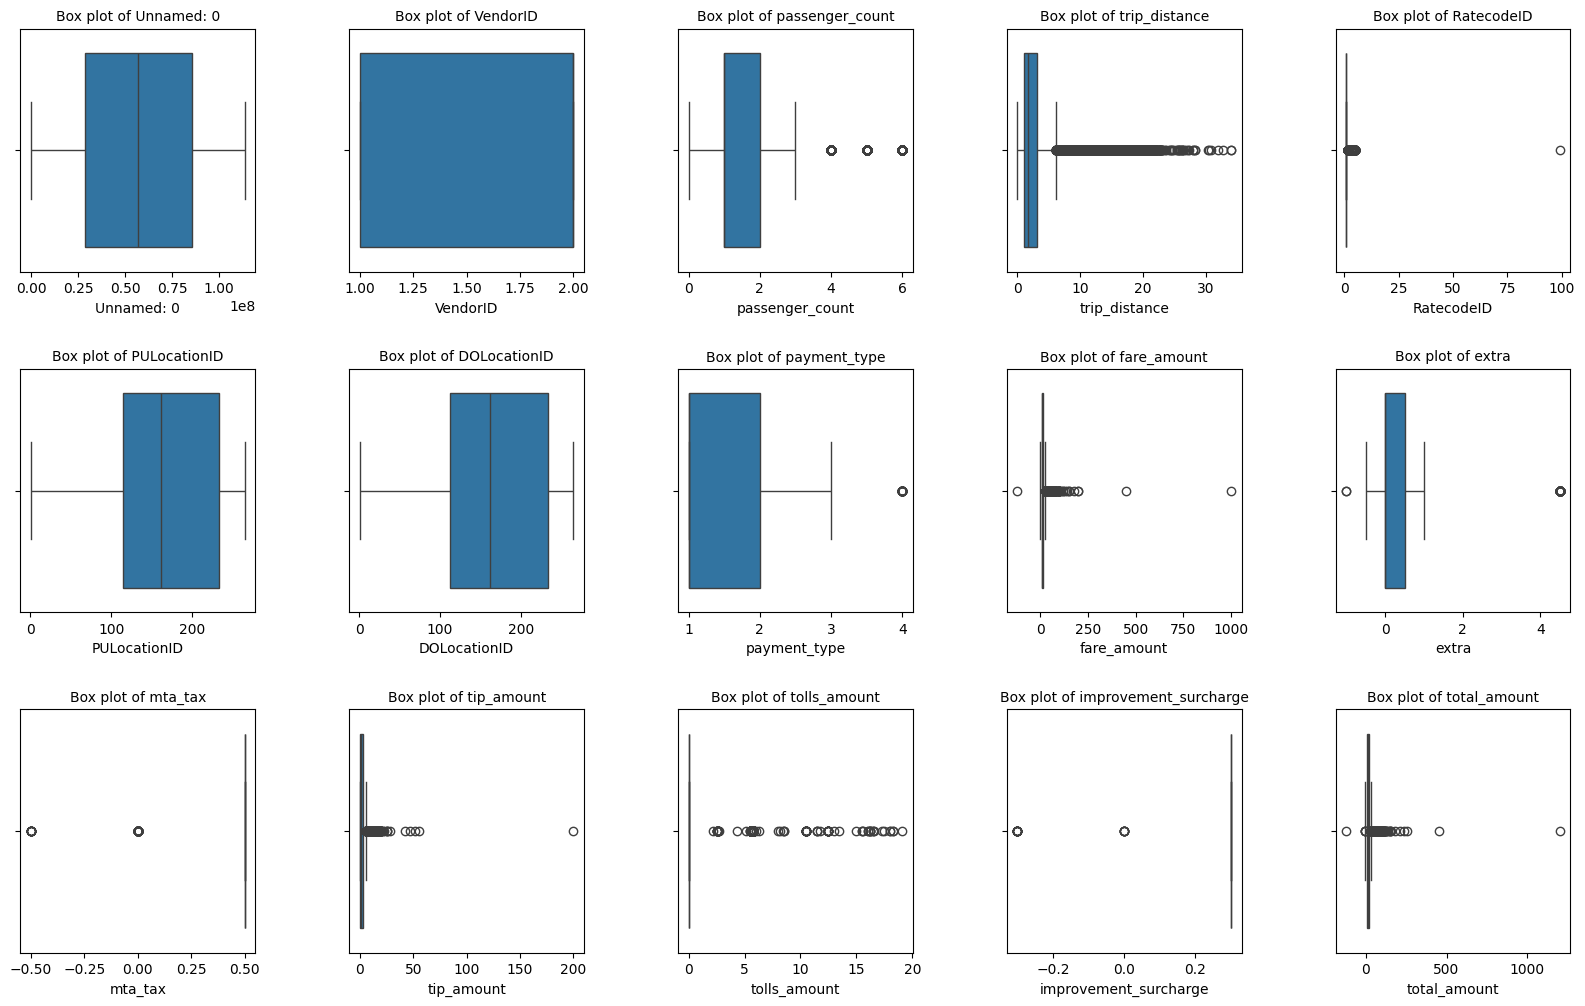

In [13]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set up a 3x5 grid of subplots
fig, axes = plt.subplots(3, 5, figsize=(20, 12))  # Adjust figsize as necessary
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust spacing between plots

# Loop through each numeric column and create a box plot in the appropriate subplot
for i, column in enumerate(numeric_columns):
    row, col = divmod(i, 5)
    sns.boxplot(data=df, x=column, ax=axes[row, col])
    axes[row, col].set_title(f'Box plot of {column}', fontsize=10)

# If there are fewer than 15 numeric columns, hide the empty subplots
for i in range(len(numeric_columns), 15):
    fig.delaxes(axes.flatten()[i])

plt.show()

In [16]:
df.nunique()

Unnamed: 0               22699
VendorID                     2
tpep_pickup_datetime     22687
tpep_dropoff_datetime    22688
passenger_count              7
trip_distance             1545
RatecodeID                   6
store_and_fwd_flag           2
PULocationID               152
DOLocationID               216
payment_type                 4
fare_amount                185
extra                        6
mta_tax                      3
tip_amount                 742
tolls_amount                38
improvement_surcharge        3
total_amount              1369
dtype: int64

#### Based on the output and the data dictionary, here are some necessary comments for each feature:

1. **Unnamed: 0**: this seems to be an unnecessary column, likely an index or a redundant identifier. Since it has unique values for every row (22699 unique values), it might not be useful for analysis and could be dropped.
   
2. **VendorID**: there are only 2 unique values, which aligns with the data dictionary (1 = Creative Mobile Technologies, LLC; 2 = VeriFone Inc.). This is categorical data, and no further action is needed.

3. **tpep_pickup_datetime** & **tpep_dropoff_datetime**: these columns should have unique values per trip, but the fact that the counts are slightly lower than the total number of rows (22687 and 22688) indicates that a few entries might have missing or duplicated datetime values. These should be reviewed to ensure completeness.

4. **passenger_count**: with only 7 unique values, it suggests a reasonable range of passenger numbers, as expected in a taxi service (the maximum is usually 6, and count starts at 0).However, since this is a driver-entered value, we should verify if these counts are within a logical range and check for outliers like zero passengers, which will need to be dropped.

5. **trip_distance**: with 1545 unique values, this is continuous numeric data. It is important to ensure that the range of distances makes sense (e.g., no negative or excessively large distances).

6. **RatecodeID**: six unique values match the expected rate codes described in the data dictionary. Need to check for consistency across trips and review any edge cases.

7. **store_and_fwd_flag**: the flag has only 2 unique values (Y and N), indicating whether the trip data was stored in memory before transmission. This looks correct, no action needed.

8. **PULocationID** & **DOLocationID**: with 152 and 216 unique values respectively, these represent taxi zones in New York. The difference in counts is expected as the number of pickup and drop-off locations could vary slightly.

9. **payment_type**: there are 4 unique values, which aligns with the data dictionary. According to boxplot analysis, only 0 to 4 values are utilised. 

10. **fare_amount**: with 185 unique values, this is continuous data. The range should be checked for negative or zero fares, which might indicate invalid trips.

11. **extra**: only 6 unique values exist, matching the various surcharges (e.g., rush hour, overnight fees). Verify that these values are correctly applied based on the timing of the trips.

12. **mta_tax**: there are 3 unique values, which suggests there could be some missing or incorrect values (since the MTA tax is usually fixed at $0.50). This should be checked to ensure consistency.

13. **tip_amount**: with 742 unique values, this indicates a wide range of tip amounts. No negative values are observed in the boxplot, and there few outliers. 

14. **tolls_amount**: there are 38 unique values, which is expected as tolls vary based on the trip route. Ensure that toll amounts are reasonable for the trips taken.

15. **improvement_surcharge**: with only 3 unique values, this likely includes the mandated $0.30 surcharge. Need to verify 0 and negative values.

16. **total_amount**: with 1369 unique values, this is continuous data representing the total trip cost. Again, it is important to check for outliers (e.g., negative or abnormally high totals).

### Key Actions:
- **Unnamed: 0** column should likely be dropped.
- **Datetime columns** have some missing or duplicate values that should be reviewed.
- **mta_tax** values should be reviewed for any missing or incorrect entries.
- **fare_amount**, **tip_amount**, and **total_amount** should be checked for outliers or incorrect entries (e.g., negative values).


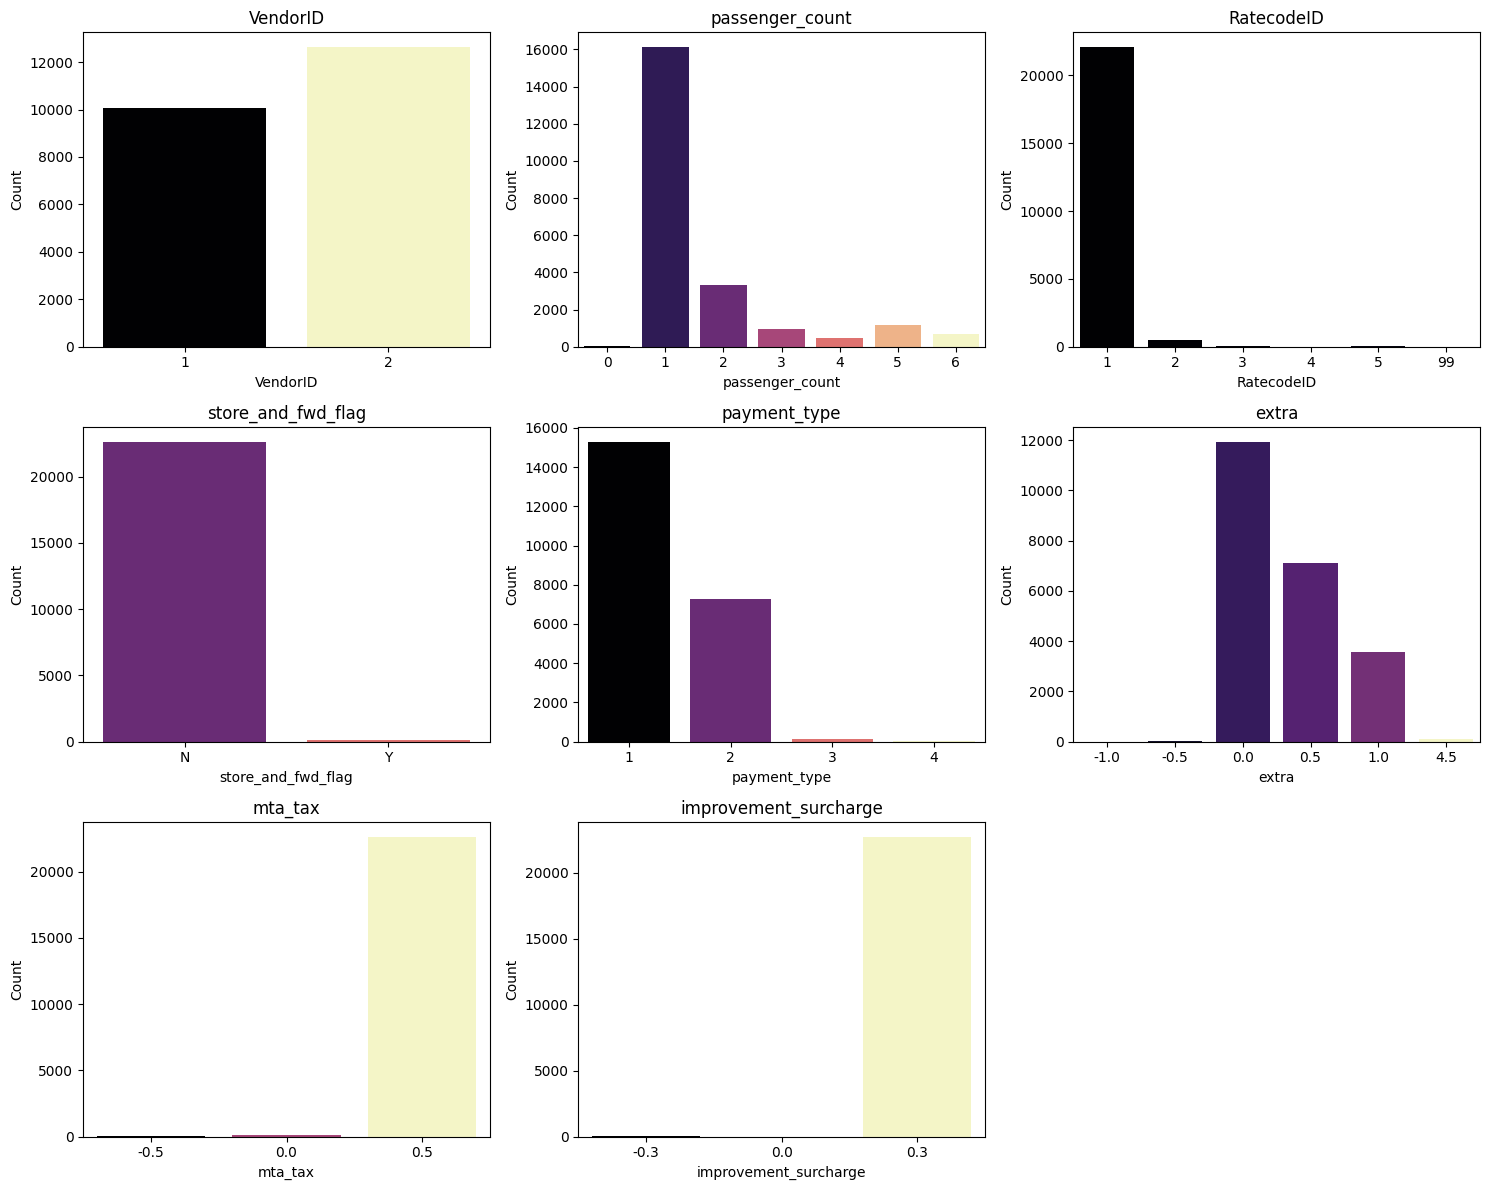

In [22]:
# Define columns with less than 10 unique values based on the previous output
columns_to_plot = ['VendorID', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'payment_type', 
                   'extra', 'mta_tax', 'improvement_surcharge']

# Set up the figure and axes for the histograms
plt.figure(figsize=(15, 12))

# Loop through each of the columns and create a count plot (histogram for categorical data)
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df[column], hue=df[column], palette='magma', legend=False)
    plt.title(f'{column}', fontsize=12)
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [25]:
df.duplicated().sum()

0

#### Additional questions

1. What are the data columns and variables and which ones are most relevant to your deliverable?

    **Most Relevant Variables for the regression model:**

    a) trip_distance: A primary variable for fare prediction.
    b) passenger_count: Affects fare, especially for negotiated or group rides.
    c) PULocationID / DOLocationID: Different zones may have variable charges.
    d) RateCodeID: Specifies special rates (e.g., airport rides, group fares).
    e) fare_amount or total_amount: The target variable to predict.

2. What units are your variables in?

* Distance: Miles (trip_distance)
* Fare and Amounts (fare_amount, total_amount, tip_amount, etc.): U.S. Dollars (USD)
* Time: Datetime format (tpep_pickup_datetime, tpep_dropoff_datetime)
* Counts: Passenger counts (passenger_count), number of unique entries

3. Are your initial presumptions about the data that can inform your EDA, knowing you will need to confirm or deny with your future findings?

* The trip distance should be positively correlated with fare_amount.
* Location data (PULocationID/DOLocationID) might capture patterns that could lead to specific zones or areas having different fare structures.
* RateCodeID will differentiate between standard fares and special cases (e.g., airport rides, negotiated fares), which should be factored into the model.
* Passenger count could affect the fare in some cases (e.g., group rides, but not all fares).
* Payment type might reveal if certain types of transactions are over- or under-estimated in the fare structure.
* Outliers: Extremely low or high fares might suggest outliers or potential errors in the dataset.

4. Is there any missing or incomplete data? 

There are not missing values in the data set. According to our initial EDA, there are come outliers and values that need to be fixed.

5. Are all pieces of this dataset in the same format?

* We will check if date/time fields are in proper datetime format and not strings.
* We will also verify that numeric fields such as trip_distance, fare_amount, and total_amount are in the correct numeric format (e.g., float or integer).
* Finally, we will ensure that categorical variables like RateCodeID, VendorID, and payment_type are in the correct categorical format, and convert if necessary.

6. EDA practices will be required to begin this project?

* **Summary Statistics:** Use df.describe() to get a quick overview of numeric features, like mean, standard deviation, and outliers.
* **Distribution plots:** Use histograms or box plots to examine the distribution of important numeric variables such as trip_distance, fare_amount, and total_amount.
* **Outlier Detection:** Use IQR or Z-score methods to detect any unusual values in fare_amount, trip_distance, etc.
* **Correlation analysis:** Use a correlation matrix (df.corr()) to identify relationships between numeric variables like trip_distance, fare_amount, and total_amount.
* **Categorical analysis:** Use bar plots or count plots to analyze categorical variables like payment_type, RateCodeID, and VendorID.
* **Datetime analysis:** Check for patterns in pickup/dropoff times using time-based groupings (e.g., hourly, daily, weekly trends).

## PACE: Analyze 

### Task 2a. Data exploration and cleaning

Given our scenario, which data columns are most applicable? 
Which data columns can I eliminate, knowing they won’t solve our problem scenario? 

Consider functions that help you understand and structure the data. 

*    head()
*    describe()
*    info()
*    groupby()
*    sortby()

What do you do about missing data (if any)? 

Are there data outliers? What are they and how might you handle them? 

What do the distributions of your variables tell you about the question you're asking or the problem you're trying to solve?

#### RESPONSE:

**1. Which data columns are most applicable?**

Given the goal of building a regression model to predict taxi fares, the most applicable columns would be:

trip_distance: This is likely the most critical predictor for estimating fares, as fare amounts typically scale with distance.
PULocationID / DOLocationID: These location-based IDs could capture patterns based on the pickup and dropoff zones, particularly if different zones have different fare structures (e.g., airport rides).
RateCodeID: This variable specifies special fare rules (e.g., airport fares, negotiated rates) that can influence the fare amount.
passenger_count: Though this might not always have a direct influence, certain rate codes like group rides might be affected by this variable.
payment_type: While this may not directly affect fare prediction, it could be used to understand if there are any systematic differences in fare structures based on payment type.
fare_amount or total_amount: These are the target variables that we want to predict using the other features.

**2. Which data columns can be eliminated, knowing they won’t solve our problem scenario?**

The following columns can likely be eliminated because they don't provide direct insight into fare prediction:

Unnamed: 0: This appears to be an unnecessary index or identifier column.
VendorID: This is not directly related to the fare amount and only identifies the service provider, which is unlikely to affect fare calculation.
store_and_fwd_flag: Indicates whether the trip was temporarily stored before transmission. This is a technical flag and unrelated to fare prediction.
tpep_pickup_datetime / tpep_dropoff_datetime: While time data may help in more advanced models (e.g., surge pricing during peak hours), for a basic regression model, these fields may not be necessary unless we extract features such as hour of the day or day of the week.
extra, mta_tax, improvement_surcharge, tip_amount, and tolls_amount: These are either fixed amounts or charges that don’t need to be predicted. While useful for total fare calculation, they don’t contribute to estimating the base fare amount.

**3. What do you do about missing data (if any)?**

If any missing data is found, here are some strategies:

Critical Features (e.g., trip_distance, fare_amount): If values for critical variables are missing (such as trip_distance or fare_amount), these rows should be removed since they are essential for both training and prediction.
Non-Critical Features (e.g., passenger_count, RateCodeID): For features like passenger_count or RateCodeID, missing data can either be imputed using:
Mean/median/mode: For continuous or categorical data.
Forward/backward fill: In the case of time-series data.

However, for categorical variables like RateCodeID, missing values should be handled carefully to avoid distorting predictions.

Drop or Impute: If the missing values are few and scattered, rows can be dropped. However, if missing data is prevalent in certain columns, consider imputation.

**4. Are there data outliers? What are they and how might you handle them?**

Outliers are critical to check, especially for numeric variables like trip_distance and fare_amount. To detect outliers:

Box Plots or Z-Score methods can identify outliers that are too far from the mean.

Potential outliers might include:

Extremely low or high fare_amount: Unusually high or low fares that don’t correspond with the trip distance (e.g., a very short trip with an abnormally high fare).

trip_distance anomalies: Trips with negative or extremely high distances.

Handling Outliers:

Investigate further: Verify if these outliers represent valid data (e.g., outlier fares could be due to tolls or surcharges).
Remove extreme outliers: If outliers are due to data entry errors or are unreasonable, they can be removed to avoid skewing the model.
Log transformation: For continuous variables like fare_amount, applying a log transformation could help mitigate the impact of extreme values.

**5. What do the distributions of your variables tell you about the question you're asking or the problem you're trying to solve?**

trip_distance: The distribution of trip distances will likely be right-skewed, with most trips falling into a shorter range and a few longer trips. This suggests that typical fares will correspond to shorter distances, but the model must account for longer trips as well.
fare_amount: The fare amount is expected to follow a similar distribution to trip_distance, but may also show steps based on rate codes, fixed fees (like airport rates), and other surcharges.
passenger_count: Most trips will likely have 1-2 passengers. Any large spikes (e.g., with 6 passengers) might correspond to specific rate codes like group rides.
PULocationID / DOLocationID: These will likely have categorical distributions, showing clusters of popular pickup/dropoff zones (e.g., airports, downtown areas). It’s important to ensure that popular zones are well-represented in the model.

**Summary:**

Most Applicable Columns: trip_distance, PULocationID, DOLocationID, RateCodeID, fare_amount, passenger_count.
Columns to Eliminate: Unnamed: 0, VendorID, store_and_fwd_flag, and surcharges like extra, mta_tax, etc., unless predicting the total fare.
Missing Data: Handle critical missing data by removal or imputation, especially for essential predictors like trip_distance and fare_amount.
Outliers: Identify and manage extreme values using visualization and statistical methods. Remove if unreasonable, or transform if valid but extreme.
Distributions: Analyze the distribution of key variables to understand fare variability and potential biases. Most relevant distributions will likely be right-skewed, requiring proper model tuning.

1. What steps need to be taken to perform EDA in the most effective way to achieve the project goal?

2. Do you need to add more data using the EDA practice of joining? What type of structuring needs to be done to this dataset, such as filtering, sorting, etc.?

3. What initial assumptions do you have about the types of visualizations that might best be suited for the intended audience? 

Start by discovering, using head and size. 

In [28]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [27]:
df.size

408582

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,22699.0,5.675849e+07,3.274493e+07,12127.0,28520556.00,56731504.00,85374524.00,1.134863e+08
VendorID,22699.0,1.556236e+00,4.968384e-01,1.0,1.00,2.00,2.00,2.000000e+00
passenger_count,22699.0,1.642319e+00,1.285231e+00,0.0,1.00,1.00,2.00,6.000000e+00
trip_distance,22699.0,2.913313e+00,3.653171e+00,0.0,0.99,1.61,3.06,3.396000e+01
RatecodeID,22699.0,1.043394e+00,7.083909e-01,1.0,1.00,1.00,1.00,9.900000e+01
PULocationID,22699.0,1.624124e+02,6.663337e+01,1.0,114.00,162.00,233.00,2.650000e+02
DOLocationID,22699.0,1.615280e+02,7.013969e+01,1.0,112.00,162.00,233.00,2.650000e+02
payment_type,22699.0,1.336887e+00,4.962111e-01,1.0,1.00,1.00,2.00,4.000000e+00
fare_amount,22699.0,1.302663e+01,1.324379e+01,-120.0,6.50,9.50,14.50,9.999900e+02
extra,22699.0,3.332746e-01,4.630966e-01,-1.0,0.00,0.00,0.50,4.500000e+00


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

## PACE: Construct 

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### Task 3. Data visualization

You’ve assessed your data, and decided on which data variables are most applicable. It’s time to plot your visualization(s)!


### Boxplots

Perform a check for outliers on relevant columns such as trip distance and trip duration. Remember, some of the best ways to identify the presence of outliers in data are box plots and histograms. 

**Note:** Remember to convert your date columns to datetime in order to derive total trip duration.  

In [31]:
# Convert data columns to datetime
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

**trip distance**

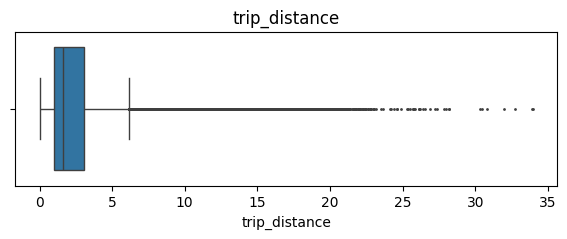

In [32]:
# Create box plot of trip_distance
plt.figure(figsize=(7,2))
plt.title('trip_distance')
sns.boxplot(data=None, x=df['trip_distance'], fliersize=1);

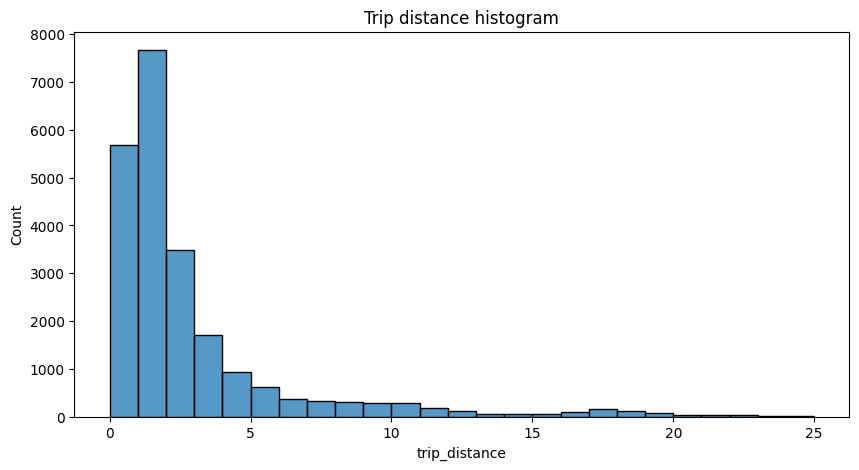

In [33]:
# Create histogram of trip_distance
plt.figure(figsize=(10,5))
sns.histplot(df['trip_distance'], bins=range(0,26,1))
plt.title('Trip distance histogram');

**total amount**

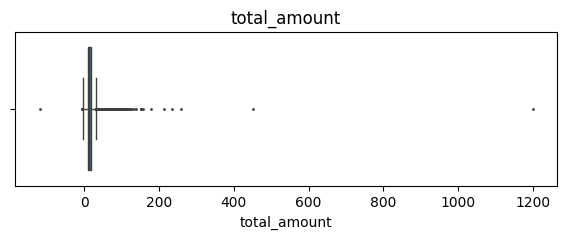

In [34]:
# Create box plot of total_amount
plt.figure(figsize=(7,2))
plt.title('total_amount')
sns.boxplot(x=df['total_amount'], fliersize=1);

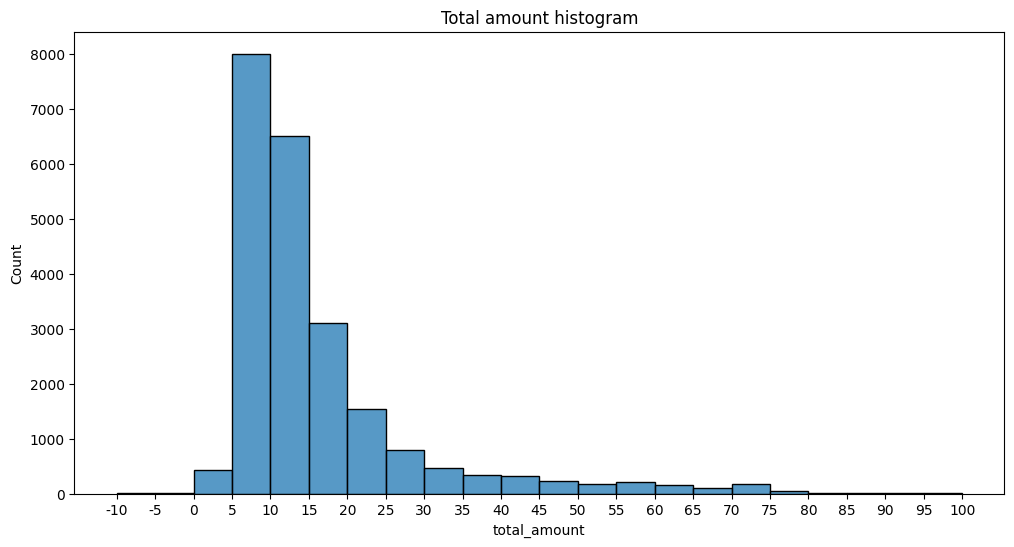

In [35]:
# Create histogram of total_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['total_amount'], bins=range(-10,101,5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.title('Total amount histogram');

**tip amount**

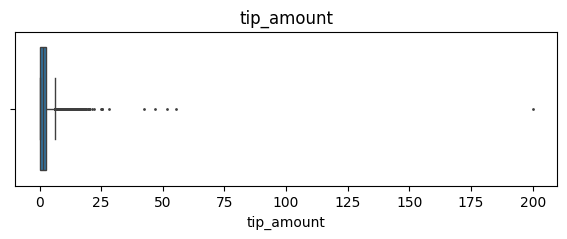

In [38]:
# Create box plot of tip_amount
plt.figure(figsize=(7,2))
plt.title('tip_amount')
sns.boxplot(x=df['tip_amount'], fliersize=1);

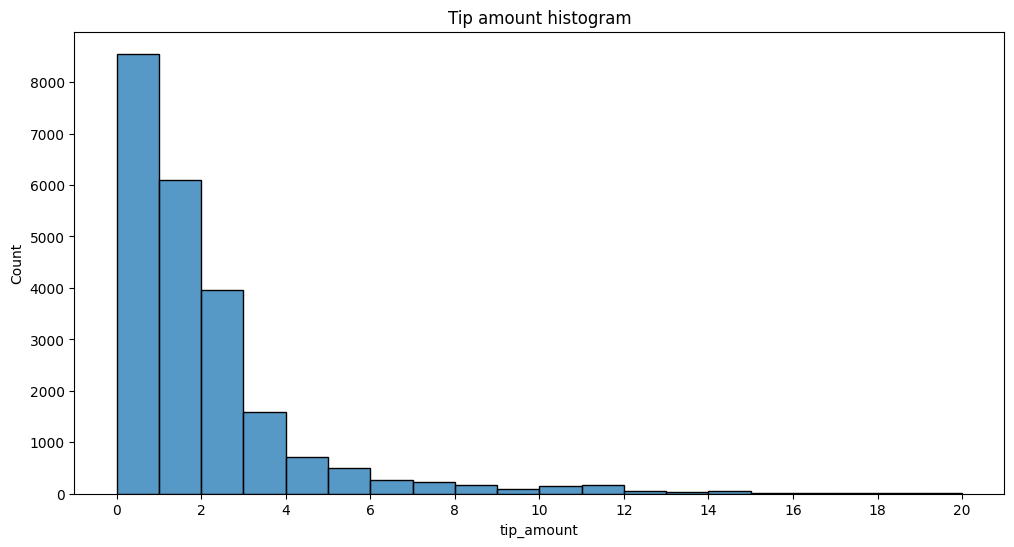

In [39]:
# Create histogram of tip_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['tip_amount'], bins=range(0,21,1))
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title('Tip amount histogram');

**tip amount by vendor**

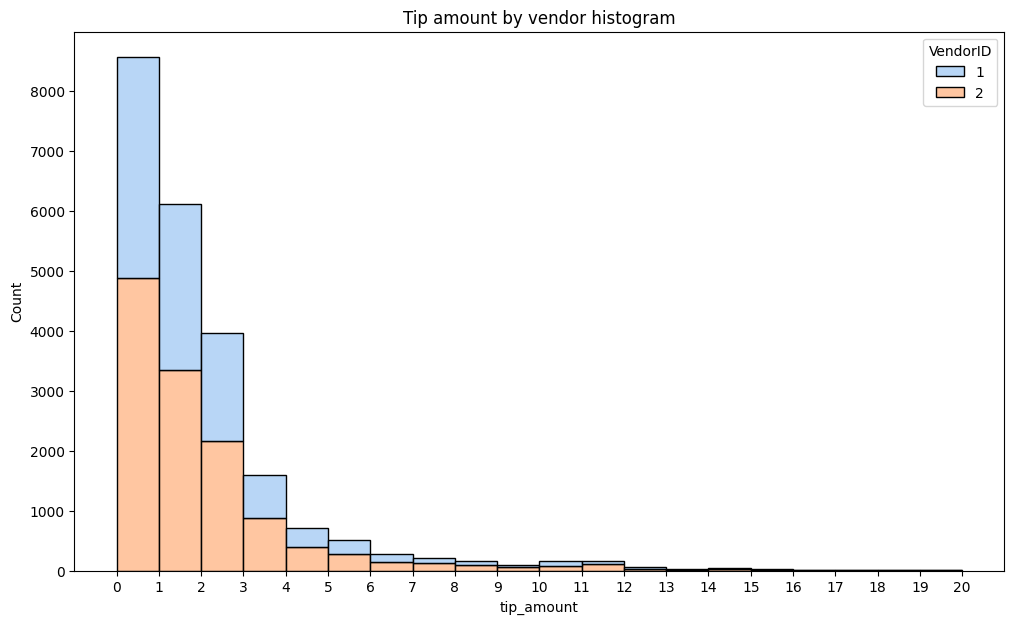

In [40]:
# Create histogram of tip_amount by vendor
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='tip_amount', bins=range(0,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram');

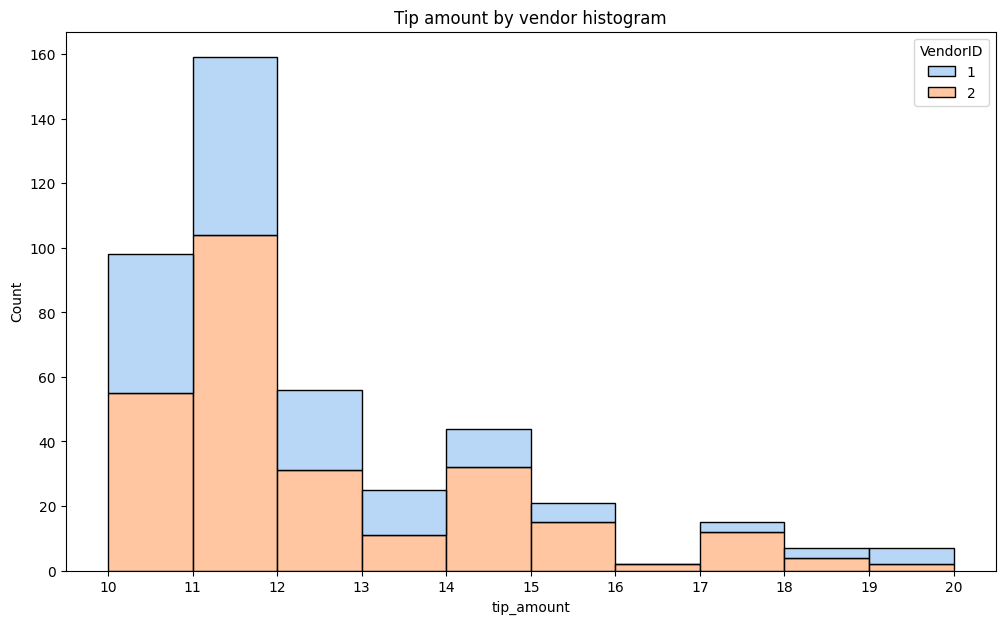

In [41]:
# Create histogram of tip_amount by vendor for tips > $10 
tips_over_ten = df[df['tip_amount'] > 10]
plt.figure(figsize=(12,7))
ax = sns.histplot(data=tips_over_ten, x='tip_amount', bins=range(10,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip amount by vendor histogram');

**Mean tips by passenger count**

Examine the unique values in the `passenger_count` column.

In [42]:
df['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

Nearly two thirds of the rides were single occupancy, though there were still nearly 700 rides with as many as six passengers. Also, there are 33 rides with an occupancy count of zero, which doesn't make sense. These would likely be dropped unless a reasonable explanation can be found for them.

In [46]:
# Calculate mean tips by passenger_count
# Convert 'tip_amount' to numeric, coercing errors to NaN
df['tip_amount'] = pd.to_numeric(df['tip_amount'], errors='coerce')

# Now calculate the mean tips by passenger_count
mean_tips_by_passenger_count = df.groupby('passenger_count')['tip_amount'].mean()

mean_tips_by_passenger_count

passenger_count
0    2.135758
1    1.848920
2    1.856378
3    1.716768
4    1.530264
5    1.873185
6    1.720260
Name: tip_amount, dtype: float64

/var/folders/0g/l4d30qyn5j7d341wrkwy65bc0000gn/T/ipykernel_48808/3633107965.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data.index,
/var/folders/0g/l4d30qyn5j7d341wrkwy65bc0000gn/T/ipykernel_48808/3633107965.py:8: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=data.index,


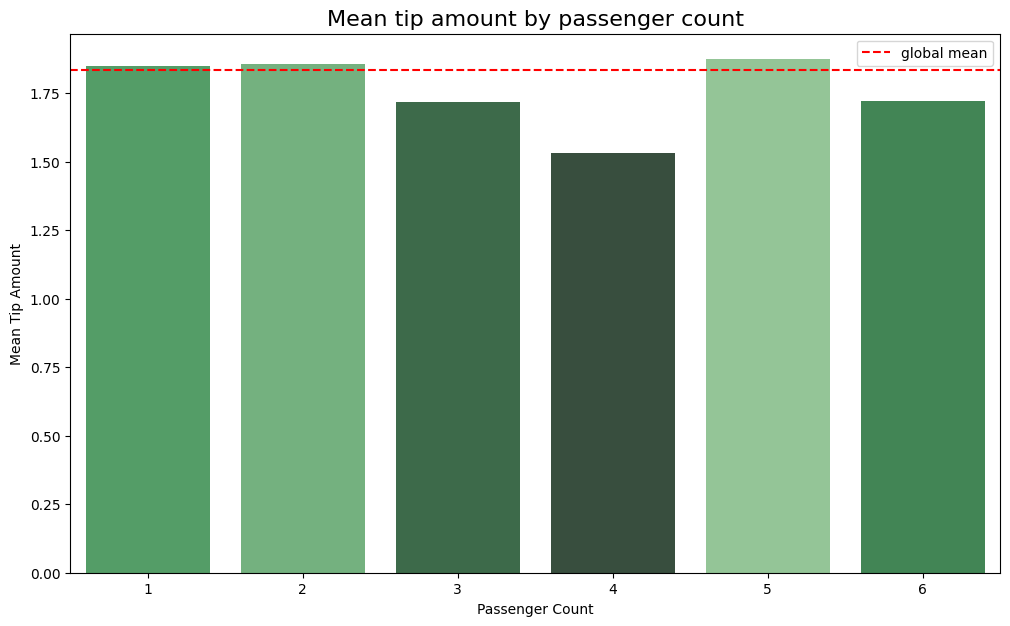

In [48]:
# Create bar plot for mean tips by passenger count
# Create bar plot for mean tips by passenger count
data = mean_tips_by_passenger_count.tail(-1)  # Exclude rows if needed
pal = sns.color_palette("Greens_d", len(data))
rank = data.argsort().argsort()  # Sorting based on the tip amounts

plt.figure(figsize=(12,7))
ax = sns.barplot(x=data.index,
                 y=data.values,  # Series has no column, use values directly
                 palette=np.array(pal[::-1])[rank])

# Add a horizontal line for the global mean of tip amounts
ax.axhline(df['tip_amount'].mean(), ls='--', color='red', label='global mean')
ax.legend()

plt.title('Mean tip amount by passenger count', fontsize=16)
plt.xlabel('Passenger Count')
plt.ylabel('Mean Tip Amount')

plt.show()

**Create month and day columns**

In [49]:
# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

**Plot total ride count by month**

Begin by calculating total ride count by month.

In [50]:
# Get total number of rides for each month
monthly_rides = df['month'].value_counts()
monthly_rides

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

Reorder the results to put the months in calendar order.

In [51]:
# Reorder the monthly ride list so months go in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

In [52]:
# Show the index
monthly_rides.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='month')

/var/folders/0g/l4d30qyn5j7d341wrkwy65bc0000gn/T/ipykernel_48808/764596986.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=monthly_rides.index, y=monthly_rides, palette='magma')
/var/folders/0g/l4d30qyn5j7d341wrkwy65bc0000gn/T/ipykernel_48808/764596986.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_order)


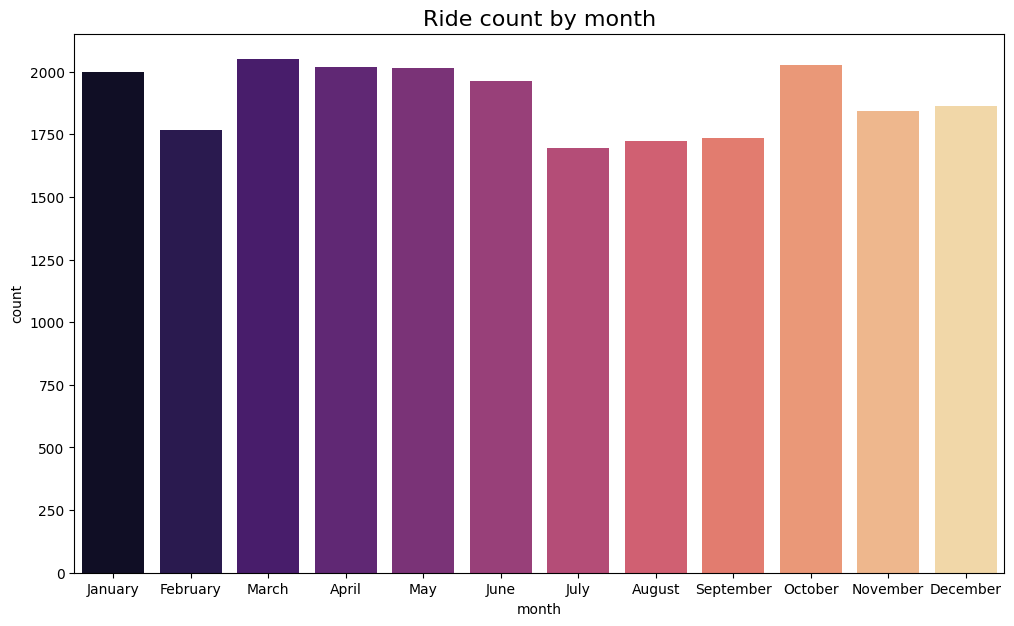

In [57]:
# Create a bar plot of total rides per month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides, palette='magma')
ax.set_xticklabels(month_order)
plt.title('Ride count by month', fontsize=16);

**Plot total ride count by day**

Repeat the above process, but now calculate the total rides by day of the week.

In [58]:
# Repeat the above process, this time for rides by day
daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

/var/folders/0g/l4d30qyn5j7d341wrkwy65bc0000gn/T/ipykernel_48808/1500525541.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=daily_rides.index, y=daily_rides, palette='magma')
/var/folders/0g/l4d30qyn5j7d341wrkwy65bc0000gn/T/ipykernel_48808/1500525541.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_order)


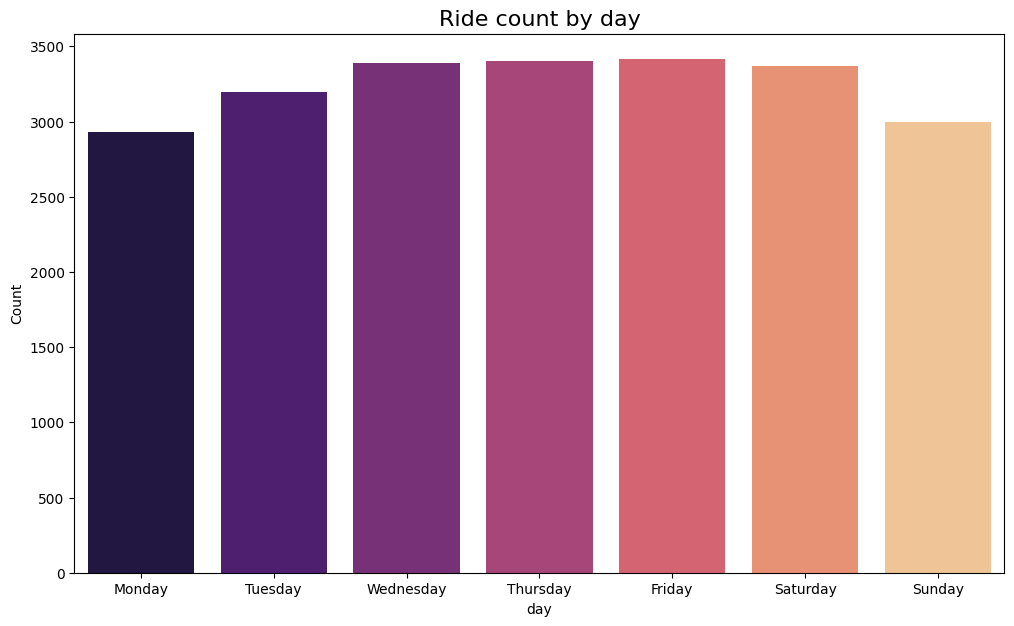

In [59]:
# Create bar plot for ride count by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x=daily_rides.index, y=daily_rides, palette='magma')
ax.set_xticklabels(day_order)
ax.set_ylabel('Count')
plt.title('Ride count by day', fontsize=16);

**Plot total revenue by day of the week**

Repeat the above process, but now calculate the total revenue by day of the week.

           total_amount
day                    
Monday         49574.37
Tuesday        52527.14
Wednesday      55310.47
Thursday       57181.91
Friday         55818.74
Saturday       51195.40
Sunday         48624.06


/var/folders/0g/l4d30qyn5j7d341wrkwy65bc0000gn/T/ipykernel_48808/1950564756.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_amount_day.index, y=total_amount_day['total_amount'], palette='magma')


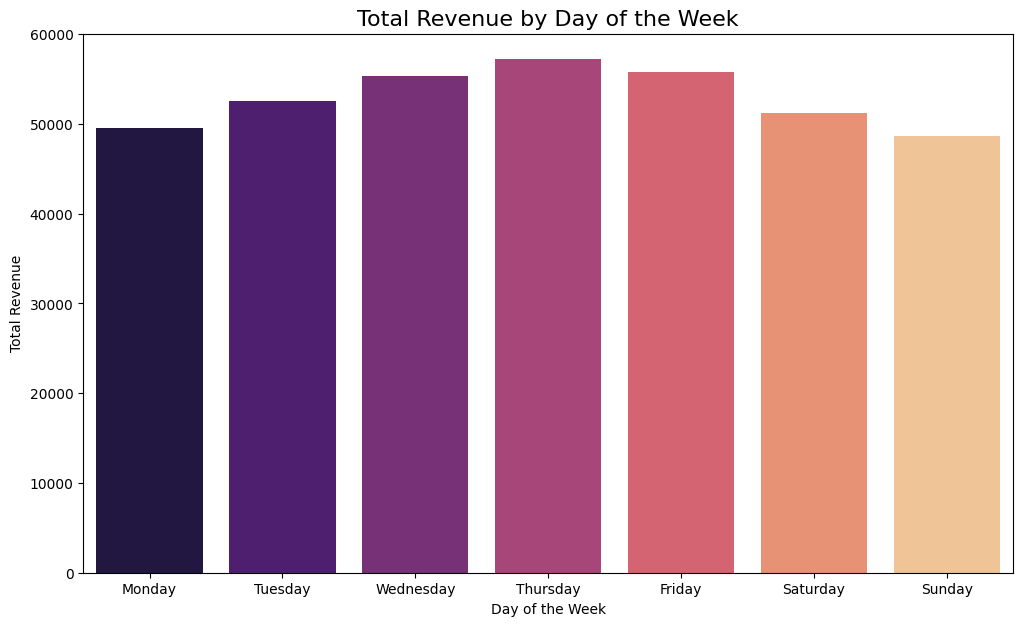

In [66]:
# Repeat the process, this time for total revenue by day
# Assuming `tpep_pickup_datetime` is your datetime column
# Extract day of the week from `tpep_pickup_datetime`
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

# Order of days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by day and sum the 'total_amount'
total_amount_day = df.groupby('day').sum(numeric_only=True)[['total_amount']]

# Reindex to ensure the days are in the correct order
total_amount_day = total_amount_day.reindex(day_order)

print(total_amount_day)

# Plotting
plt.figure(figsize=(12,7))
pal = sns.color_palette("Blues_d", len(total_amount_day))
sns.barplot(x=total_amount_day.index, y=total_amount_day['total_amount'], palette='magma')

plt.title('Total Revenue by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue')
plt.show()

**Plot total revenue by month**

           total_amount
day                    
Monday         49574.37
Tuesday        52527.14
Wednesday      55310.47
Thursday       57181.91
Friday         55818.74
Saturday       51195.40
Sunday         48624.06


/var/folders/0g/l4d30qyn5j7d341wrkwy65bc0000gn/T/ipykernel_48808/2149140664.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_amount_month.index, y=total_amount_month['total_amount'], palette='magma')


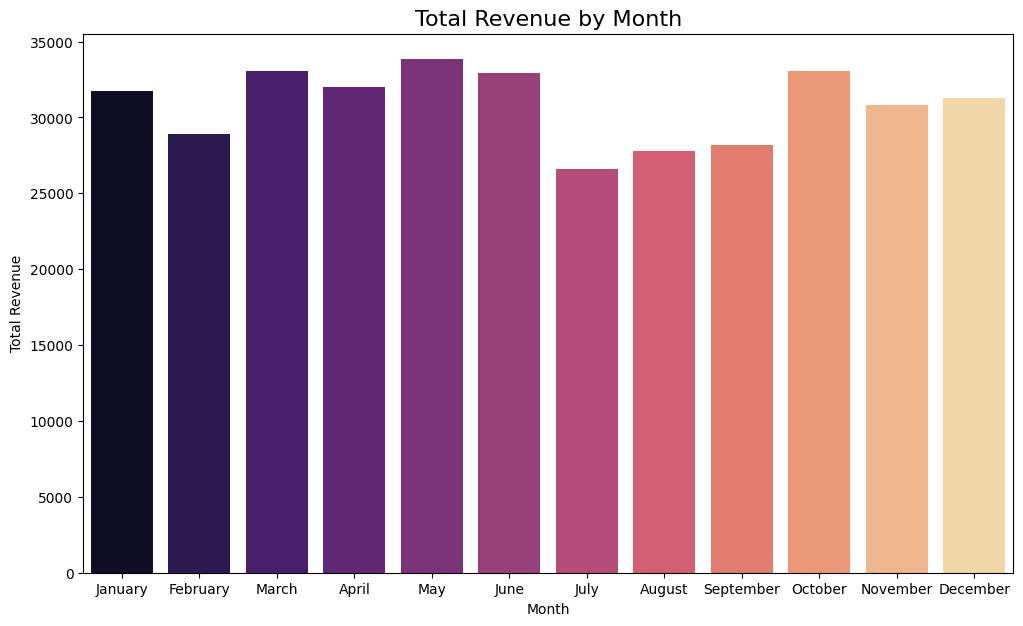

In [69]:
# Repeat the process, this time for total revenue by day
# Assuming `tpep_pickup_datetime` is your datetime column
# Extract month from `tpep_pickup_datetime`
df['month'] = df['tpep_pickup_datetime'].dt.month_name()

# Order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Group by month and sum the 'total_amount'
total_amount_month = df.groupby('month').sum(numeric_only=True)[['total_amount']]

# Reindex to ensure the months are in the correct order
total_amount_month = total_amount_month.reindex(month_order)

print(total_amount_day)

# Plotting
plt.figure(figsize=(12,7))
pal = sns.color_palette("Blues_d", len(total_amount_month))
sns.barplot(x=total_amount_month.index, y=total_amount_month['total_amount'], palette='magma')

plt.title('Total Revenue by Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

**Plot mean trip distance by drop-off location**

In [70]:
# Get number of unique drop-off location IDs
df['DOLocationID'].nunique()

216

In [72]:
# Calculate the mean trip distance for each drop-off location, ensuring only numeric data is included
distance_by_dropoff = df.groupby('DOLocationID', as_index=True).mean(numeric_only=True)[['trip_distance']]

# Sort the results in descending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance', ascending=False)

# Display the result
distance_by_dropoff

,trip_distance
DOLocationID,
23,24.275000
29,21.650000
210,20.500000
11,17.945000
51,17.310000
...,...
137,1.818852
234,1.727806
237,1.555494


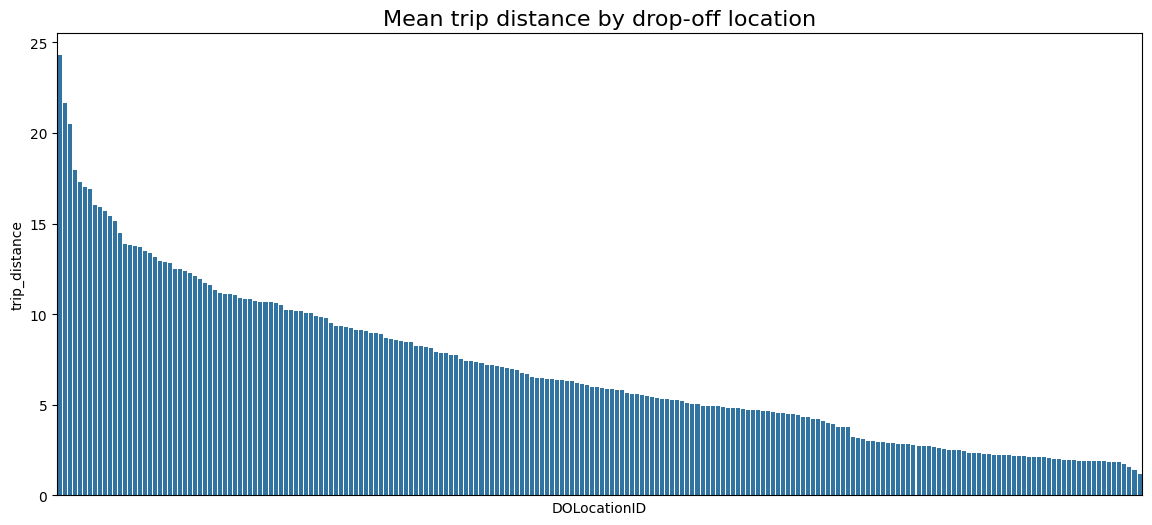

In [73]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(14,6))
ax = sns.barplot(x=distance_by_dropoff.index, 
                 y=distance_by_dropoff['trip_distance'],
                 order=distance_by_dropoff.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=16);

## BONUS CONTENT

To confirm your conclusion, consider the following experiment:
1. Create a sample of coordinates from a normal distribution&mdash;in this case 1,500 pairs of points from a normal distribution with a mean of 10 and a standard deviation of 5
2. Calculate the distance between each pair of coordinates 
3. Group the coordinates by endpoint and calculate the mean distance between that endpoint and all other points it was paired with
4. Plot the mean distance for each unique endpoint

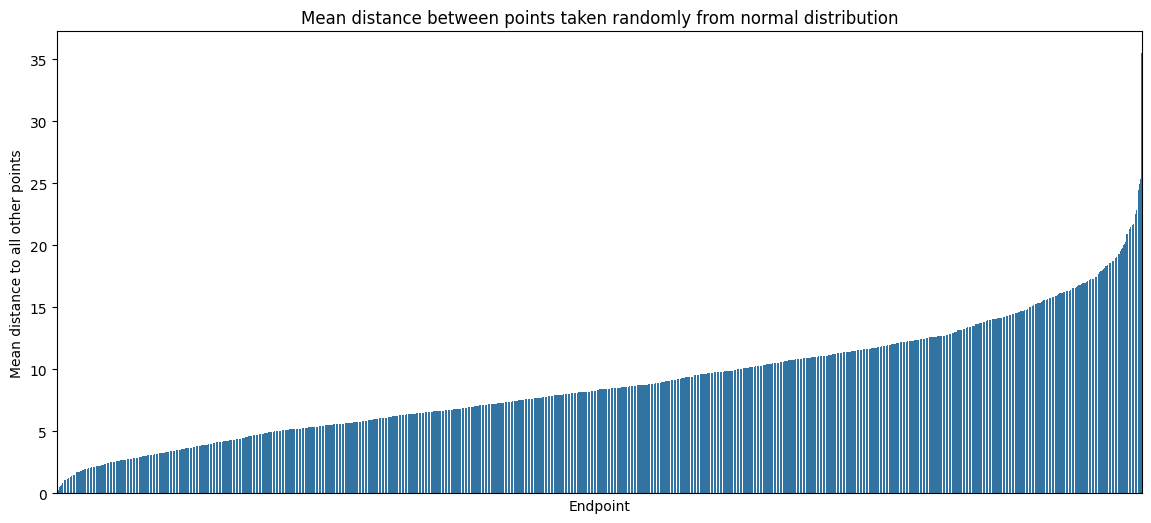

In [75]:
# 1# 1. Generate random points on a 2D plane from a normal distribution
test = np.round(np.random.normal(10, 5, (3000, 2)), 1)
midway = int(len(test) / 2)  # Calculate midpoint of the array of coordinates
start = test[:midway]        # Isolate first half of array ("pick-up locations")
end = test[midway:]          # Isolate second half of array ("drop-off locations")

# 2. Calculate Euclidean distances between points in first half and second half of array
distances = (start - end)**2
distances = distances.sum(axis=-1)
distances = np.sqrt(distances)

# 3. Group the coordinates by "drop-off location", compute mean distance
test_df = pd.DataFrame({'start': [tuple(x) for x in start.tolist()],
                        'end': [tuple(x) for x in end.tolist()],
                        'distance': distances})
data = test_df[['end', 'distance']].groupby('end').mean()
data = data.sort_values(by='distance')

# Convert tuple index (drop-off locations) to strings
data.index = data.index.map(str)

# 4. Plot the mean distance between each endpoint ("drop-off location") and all points it connected to
plt.figure(figsize=(14, 6))
ax = sns.barplot(x=data.index, y=data['distance'], order=data.index)

# Adjust x-axis labels
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xlabel('Endpoint')
ax.set_ylabel('Mean distance to all other points')
ax.set_title('Mean distance between points taken randomly from normal distribution')

plt.show()

**Histogram of rides by drop-off location**

First, check to whether the drop-off locations IDs are consecutively numbered. For instance, does it go 1, 2, 3, 4..., or are some numbers missing (e.g., 1, 3, 4...). If numbers aren't all consecutive, the histogram will look like some locations have very few or no rides when in reality there's no bar because there's no location. 

In [76]:
# Check if all drop-off locations are consecutively numbered
df['DOLocationID'].max() - len(set(df['DOLocationID'])) 

49

To eliminate the spaces in the historgram that these missing numbers would create, sort the unique drop-off location values, then convert them to strings. This will make the histplot function display all bars directly next to each other. 

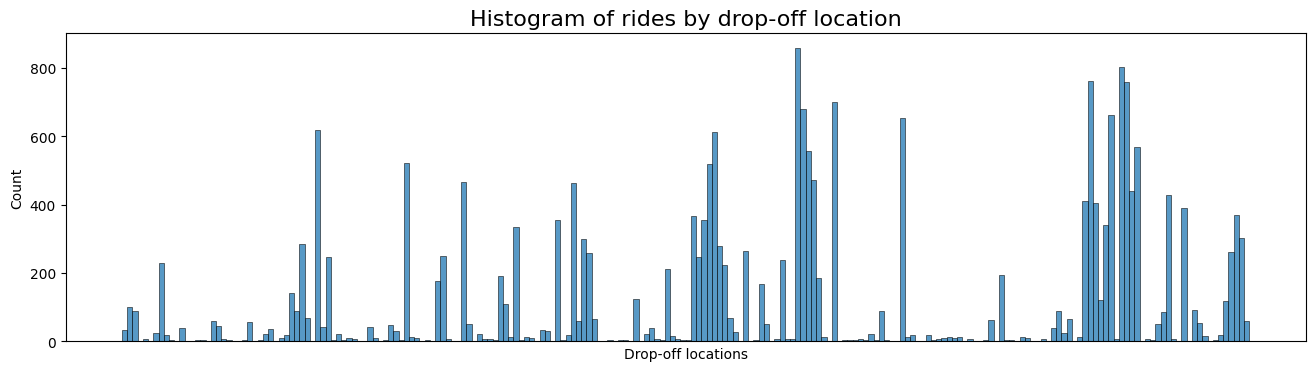

In [77]:
plt.figure(figsize=(16,4))
# DOLocationID column is numeric, so sort in ascending order
sorted_dropoffs = df['DOLocationID'].sort_values()
# Convert to string
sorted_dropoffs = sorted_dropoffs.astype('str')
# Plot
sns.histplot(sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16);

## PACE: Execute 

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.